Classification Models to be implemented: Logistic Regression, Decision Tree, Random Forest, Adaboost, XGBoost, k-Nearest Neighbors (KNN) and Naive Bayes.

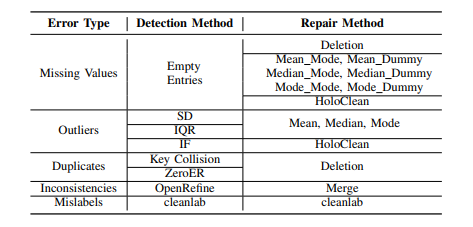

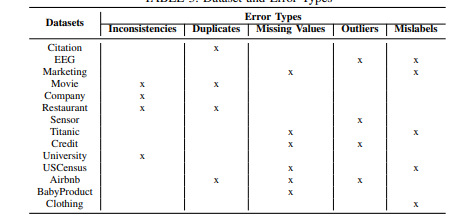

In [ ]:
# Loading the Pre-Processed datasets based on error types
import pandas as pd
#Airbnb dataset
## note: Duplicates have been removed in the intial preprocessing stage
## note: noise imputations into the dataset is not done
out_HC_airbnb=pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/Airbnb/outliers/clean_HC_impute_holoclean_train.csv')
out_HC_airbnb = out_HC_airbnb.drop(columns=['LocationName'],axis=1)
out_mean_airbnb=pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/Airbnb/outliers/clean_SD_impute_mean_dummy_test.csv')
out_mean_airbnb = out_mean_airbnb.drop(columns=['LocationName'],axis=1)
mv_HC_airbnb=pd.read_csv("/content/drive/MyDrive/ADA_Datasets/data/Airbnb/raw/Holoclean_mv_clean.csv")
mv_HC_airbnb = mv_HC_airbnb.drop(columns=['LocationName'],axis=1)
#Citation dataset
#Company dataset
inconsist_merge_company= pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/Company/inconsistency/clean_train.csv')
#Credit dataset
mv_HC_credit=pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/Credit/raw/Holoclean_mv_clean.csv')
out_HC_credit=pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/Credit/raw/Holoclean_outlier_clean.csv')
#EEG dataset
## note: mislabels are not cleaned
out_HC_EEG=pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/EEG/raw/Holoclean_outlier_clean.csv')
#Marketing dataset
mv_HC_market=pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/Marketing/raw/Holoclean_mv_clean.csv')
#Movie dataset
inconsist_merge_movie=pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/Movie/inconsistency/clean_train.csv')
#Restaurant dataset
inconsist_merge_restaurant= pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/Restaurant/raw/inconsistency_clean_raw.csv')
#Sensor dataset
out_HC_sensor=pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/Sensor/raw/Holoclean_outlier_clean.csv')
#Titanic dataset
mv_HC_titanic=pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/Titanic/raw/Holoclean_mv_clean.csv')
#USCensus dataset
mv_HC_USC=pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/USCensus/raw/Holoclean_mv_clean.csv')
#University dataset
inconsist_merge_univ=pd.read_csv('/content/drive/MyDrive/ADA_Datasets/data/University/raw/inconsistency_clean_raw.csv')

In [ ]:
inconsist_merge_company = inconsist_merge_company.drop(columns=["Date", "Unnamed: 0", "City"],axis=1)
inconsist_merge_company=pd.get_dummies(inconsist_merge_company)


mv_HC_market=pd.get_dummies(mv_HC_market)

inconsist_merge_movie = inconsist_merge_movie.drop(columns=['title'],axis=1)
inconsist_merge_movie=pd.get_dummies(inconsist_merge_movie)

out_HC_sensor = out_HC_sensor.drop(columns=['date'],axis=1)

mv_HC_titanic = mv_HC_titanic.drop(columns=['PassengerId', 'Name'],axis=1)
mv_HC_titanic=pd.get_dummies(mv_HC_titanic)

mv_HC_USC=pd.get_dummies(mv_HC_USC)

In [ ]:
inconsist_merge_univ=inconsist_merge_univ.drop(columns=["university name", "academic-emphasis",'state','location','control','no-of-students thous'])

In [ ]:

#X = out_HC_airbnb.drop(columns=['Survived'],axis=1)
#y = train_data['Survived']

def test1(df,target,drop):
  X = df.drop(columns=[target,drop],axis=1)
  y = df[target]
  return logreg(X,y),destree(X,y),randfort(X,y),xgb(X,y),knnclass(X,y),gaussNB(X,y)
drop='NA'
air_out_HC, air_out_mean, air_mv_HC= test1(out_HC_airbnb,'Rating'), test1(out_mean_airbnb,'Rating'), test1(mv_HC_airbnb,'Rating')
comp_inconsist_merge=test1(inconsist_merge_company,'Sentiment')
credit_mv_HC, credit_out_HC=test1(mv_HC_credit,'SeriousDlqin2yrs',drop),test1(out_HC_credit,'SeriousDlqin2yrs',drop)#best
eeg_out_HC=test1(out_HC_EEG,'Eye',drop)
market_mv_HC=test1(mv_HC_market,'Income',drop)
movie_inconsist_merge=test1(inconsist_merge_movie,'genres',drop)
rest_inconsist_merge=test1(inconsist_merge_restaurant,'priceRange',["streetAddress", "telephone", "website"])#best
sensor_out_HC=test1(out_HC_sensor,'moteid',drop)#best
titanic_mv_HC=test1(mv_HC_titanic,'Survived',drop)
USC_mv_HC=test1(mv_HC_USC,'Income',drop)
univ_inconsist_merge=test1(inconsist_merge_univ,'expenses thous$',drop)

In [ ]:
#LOGISTIC regression 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from statistics import mode



from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
def logreg(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
  model = LogisticRegression(max_iter = 500000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = model.score(X_test, y_test)
  return accuracy

In [ ]:
#DECISION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
#X = dt.iloc[:, [2,3]].values
#y = dt.iloc[:, 4].values
def destree(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)
  classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  return(acc)

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

def randfort(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [ ]:
#XGBoost Classifier


# importing required libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def xgb(X,y):
  model = XGBClassifier()
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  # fit the model with the training data
  model.fit(X_train,y_train)

  predict_test = model.predict(X_test)

  # Accuracy Score on test dataset
  accuracy_test = accuracy_score(y_test,predict_test)
  return accuracy_test


In [ ]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#X = knn.iloc[:, [1,2,3,4]].values
#y = knn.iloc[:, 5].values
def knnclass(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)
  classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  return acc

In [ ]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def gaussNB(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)
  classifier=GaussianNB()
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  return acc

In [ ]:
air_out_HC
air_out_mean
air_mv_HC
comp_inconsist_merge
credit_mv_HC
credit_out_HC
eeg_out_HC
market_mv_HC
movie_inconsist_merge
rest_inconsist_merge
sensor_out_HC
titanic_mv_HC
USC_mv_HC
univ_inconsist_merge

In [ ]:
datasets=('air_out_HC','air_out_mean','air_mv_HC','comp_inconsist_merge','credit_mv_HC','credit_out_HC','eeg_out_HC','market_mv_HC','movie_inconsist_merge','rest_inconsist_merge','sensor_out_HC','titanic_mv_HC','USC_mv_HC','univ_inconsist_merge')
accq=(air_out_HC,air_out_mean,air_mv_HC,comp_inconsist_merge,credit_mv_HC,credit_out_HC,eeg_out_HC,market_mv_HC,movie_inconsist_merge,rest_inconsist_merge,sensor_out_HC,titanic_mv_HC,USC_mv_HC,univ_inconsist_merge)
methods= ('Logistic Regression',' Decision Tree',' Random Forest',' Adaboost',' XGBoost',' k-Nearest Neighbors (KNN)','Naive Bayes')

In [ ]:
count=0
for i in accq:
  print(datasets[count],"\t",i,"\n")
  count=count+1

air_out_HC 	 (0.6781833985223815, 0.6662140141227594, 0.7033898305084746, 0.7081703607127336, 0.66811515480717, 0.6518196632265073) 

air_out_mean 	 (0.6646372399797057, 0.631578947368421, 0.684931506849315, 0.6905124302384577, 0.6601141407736208, 0.6265060240963856) 

air_mv_HC 	 (0.6792566670689031, 0.7014632674611555, 0.70978641245324, 0.7059249426813081, 0.6724996228692111, 0.6536430834213305) 

comp_inconsist_merge 	 (0.6770403587443946, 0.6698430493273543, 0.6398206278026906, 0.6765022421524663, 0.6624439461883408, 0.6725336322869955) 

credit_mv_HC 	 (0.9330933333333333, 0.8992333333333333, 0.9366133333333333, 0.93728, 0.9318333333333333, 0.9319333333333333) 

credit_out_HC 	 (0.9336836503924438, 0.8940716720711732, 0.9331847811626979, 0.9314886257815618, 0.9265818574873202, 0.8935727945456057) 

eeg_out_HC 	 (0.6534045393858477, 0.8304405874499332, 0.8664886515353805, 0.811214953271028, 0.9579439252336449, 0.5080106809078772) 

market_mv_HC 	 (0.7665629168519342, 0.717065036131